In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
class RunResult:
    def __init__(self, errors, evs, params, hessian):
        self.errors = errors
        self.evs = evs
        self.params = params
        self.hessian = hessian

,error,error
0,893363.696419,893386.958694
1,889725.419952,776910.758692
2,885776.847471,NaN
3,881491.856071,NaN
4,876851.907242,NaN
5,871824.945243,NaN
6,866421.251436,NaN
7,860608.414891,NaN
8,854376.723406,NaN
9,847707.007618,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-523342.818567,-455610.989060,-280347.08844,-230163.272366,-169366.298891,-39523.545890,-7863.770351,-3123.559150,-1238.202731,-588.896145,-221.627785,-85.563980,187.994550,744.195007,1164.774011,1933.018523,3875.640906,10937.083839,19441.00176,67275.786626,128677.225033,295778.768916,905202.097579,1.221762e+06,1.914954e+06,2.440354e+06,2.953336e+06,8.910303e+06,9.547738e+06,1.812605e+07,3.826367e+07,7.154176e+07,1.900839e+08,4.510065e+08,5.340569e+08,8.623538e+08,4.736211e+10
1,-547943.894533,-36547.369807,-24370.95917,-5471.761240,-1580.682998,-515.599484,-317.640261,20.028931,81.376724,379.029398,433.300959,1224.634186,3387.345025,3613.391836,6203.489413,11302.169784,15346.011970,26712.508784,81045.00937,215794.295697,326321.579460,459408.598438,647008.096344,9.251407e+05,1.101869e+06,1.286932e+06,1.550340e+06,3.674589e+06,5.219674e+06,1.087814e+07,2.330572e+07,4.800662e+07,1.550225e+08,4.057360e+08,5.072314e+08,7.929436e+08,4.809663e+10


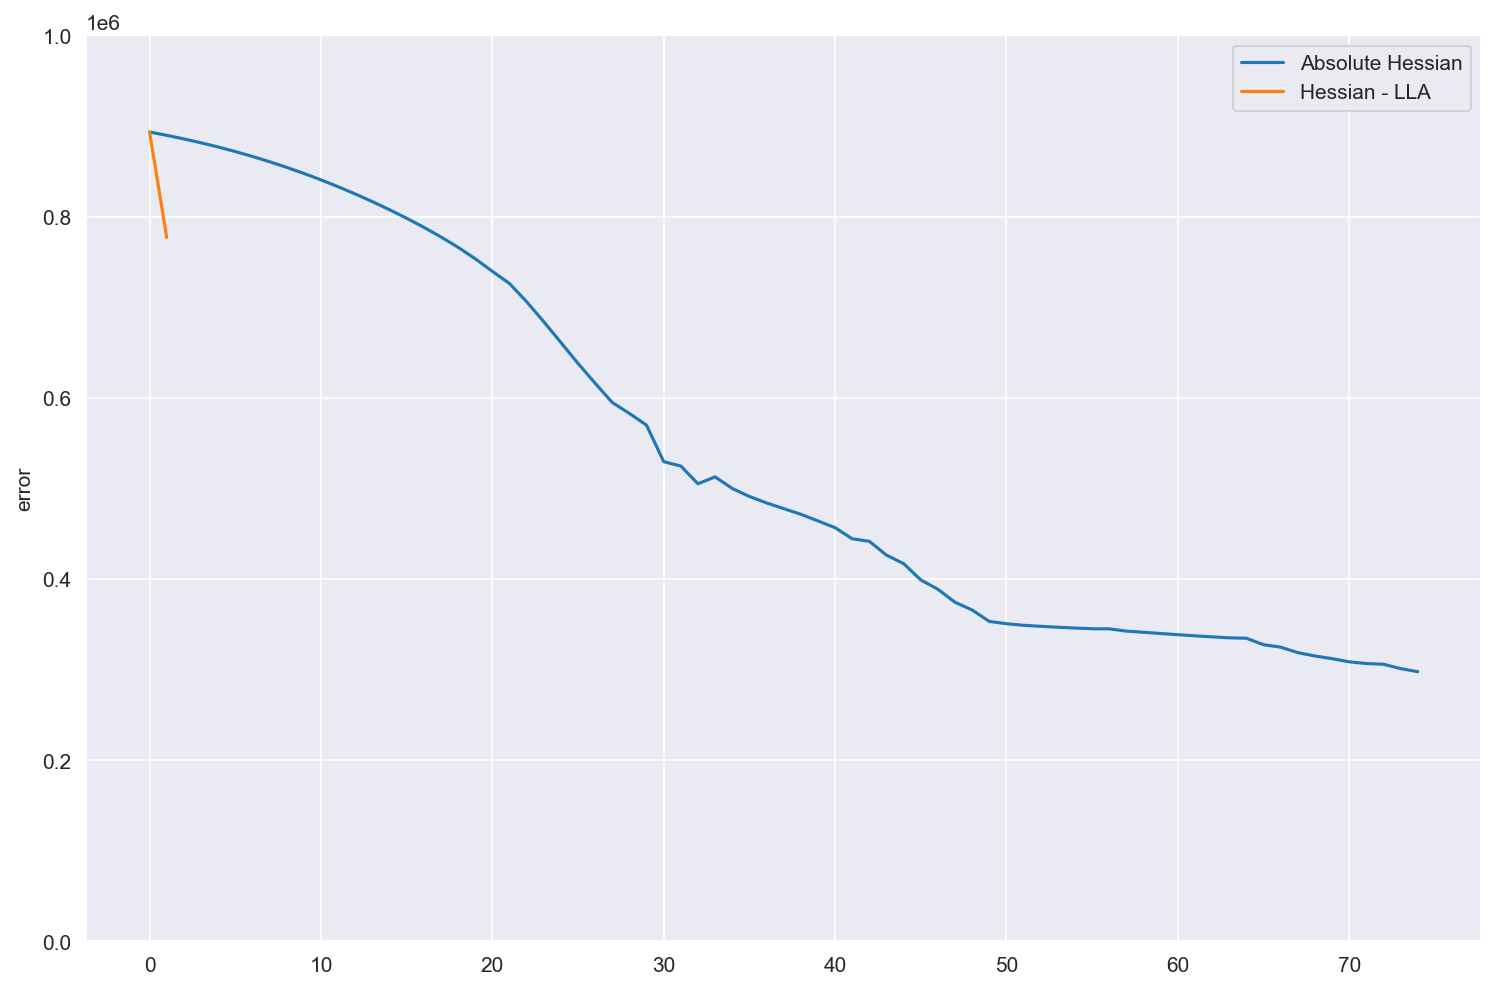

In [314]:
import os

def get_run_result(summ_dir):
    summ_fns = os.listdir(summ_dir)

    jsons = []
    errors = []
    evs = []
    params = []
    hessian = []
    for fn in summ_fns:
        with open(summ_dir + fn) as file:
            data = json.load(file)
            jsons.append(data)
            evs.append(data['evs'])
            errors.append(data['error'])
            params.append(data['params'])
            hessian.append(data['hessian'])


    errors = pd.Series(errors, name='error')
    evs = pd.DataFrame(evs)

    return RunResult(errors, evs, np.array(params), np.array(hessian))

abh = get_run_result('../../archivesfixed/abh/summaries/')
hes = get_run_result('../../summaries/')

display(pd.concat([abh.errors, hes.errors], axis=1))

plt.figure(figsize=(12, 8), dpi=150)
ax = 0
for rr in [abh, hes]:
    ax = sns.lineplot(x=rr.errors.index, y=rr.errors)

ax.legend(['Absolute Hessian', 'Hessian - LLA'])
ax.set(ylim=(0, 1e6))
hes.evs

<AxesSubplot:>

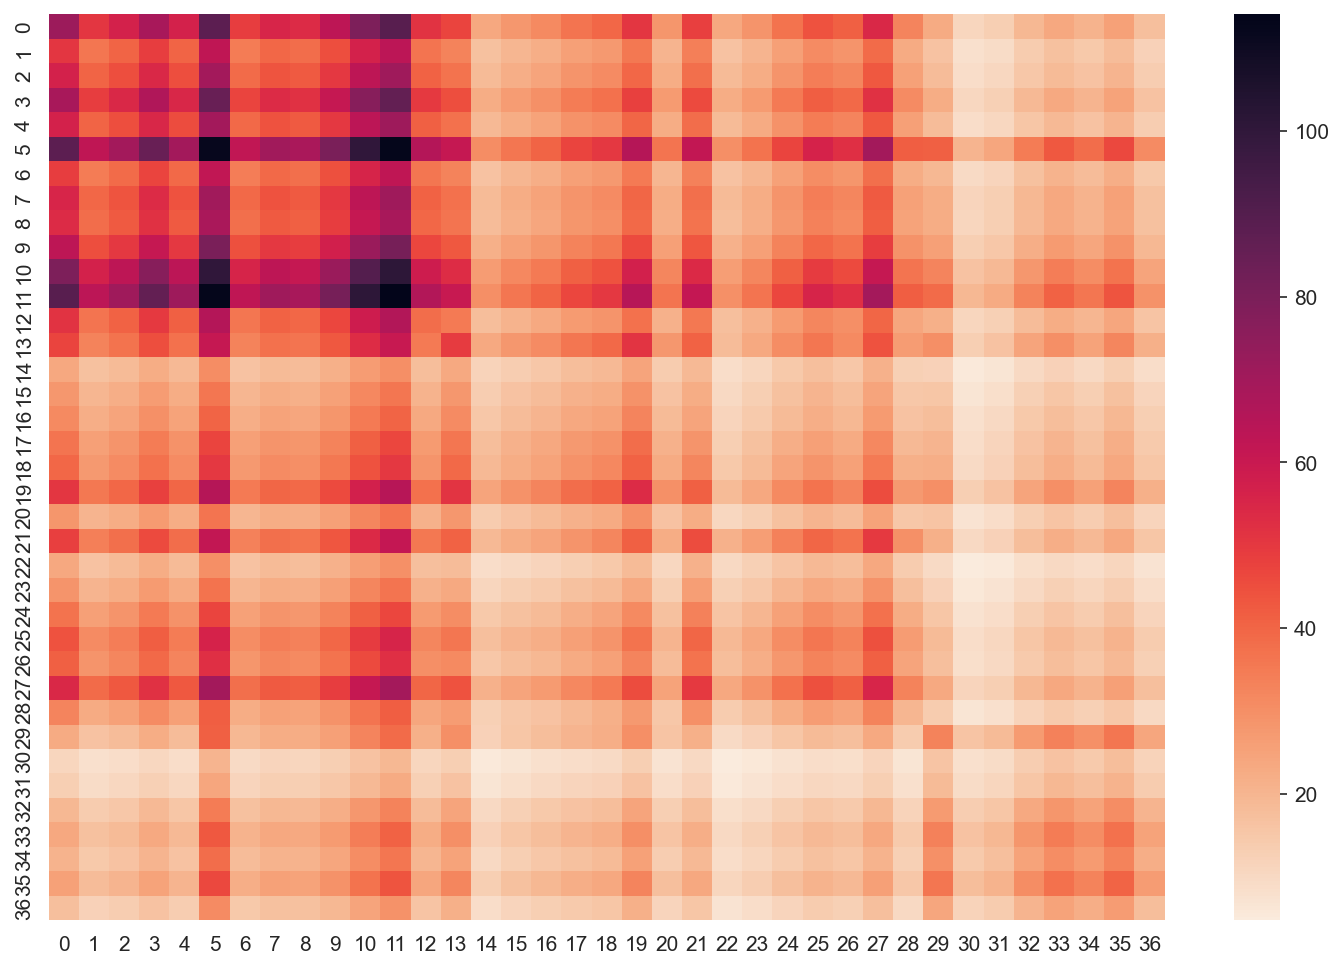

In [313]:
plt.figure(figsize=(12, 8), dpi=150)

sns.heatmap(np.power(np.abs(hes.hessian[0]), 1/5), cmap='rocket_r')

<AxesSubplot:>

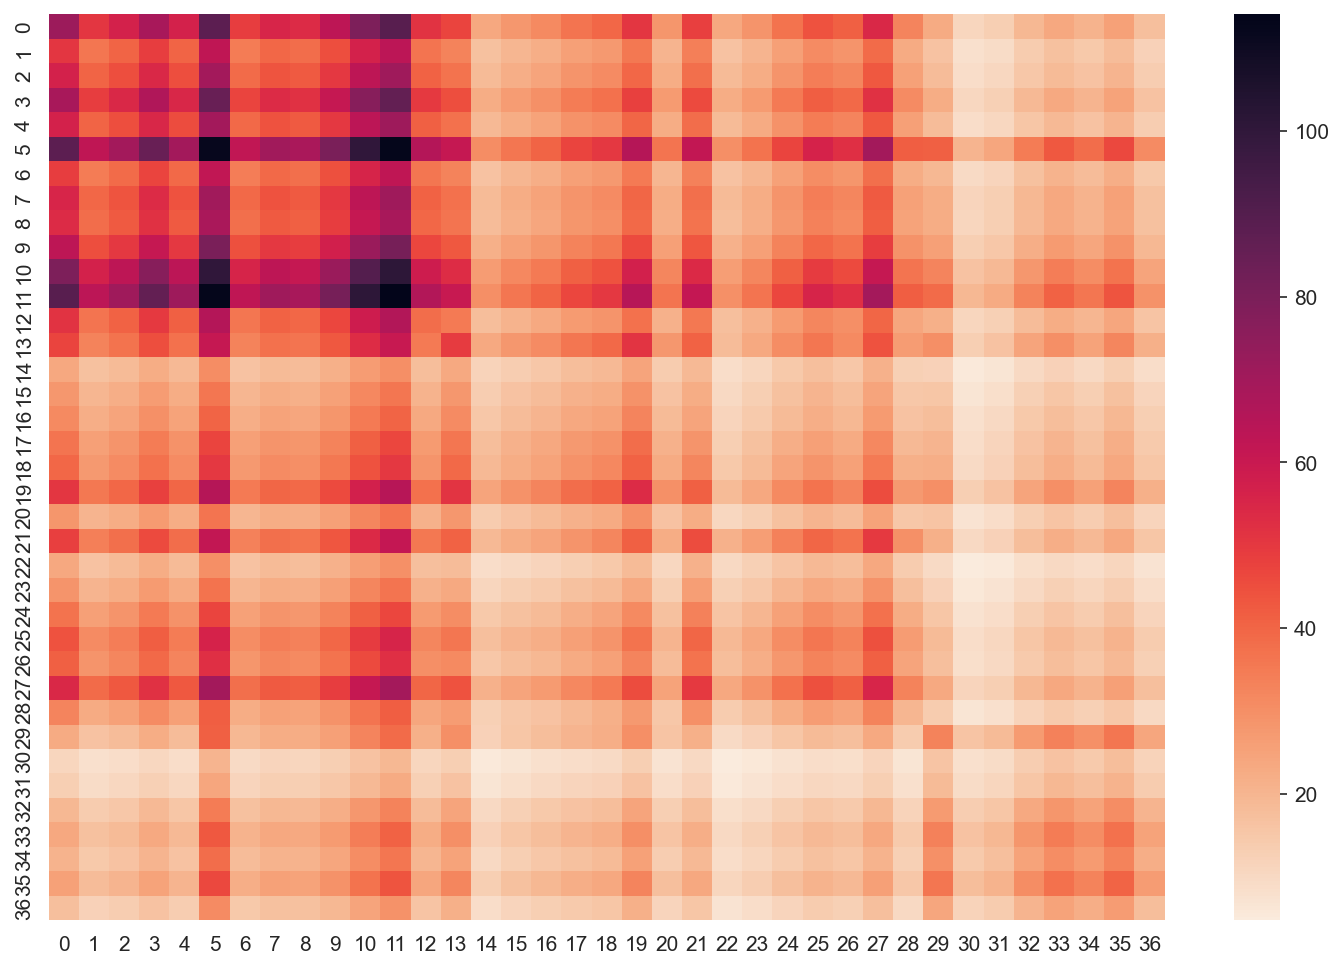

In [287]:
plt.figure(figsize=(12, 8), dpi=150)

sns.heatmap(np.power(np.abs(hes.hessian[0]), 1 / 5), cmap='rocket_r')

<AxesSubplot:>

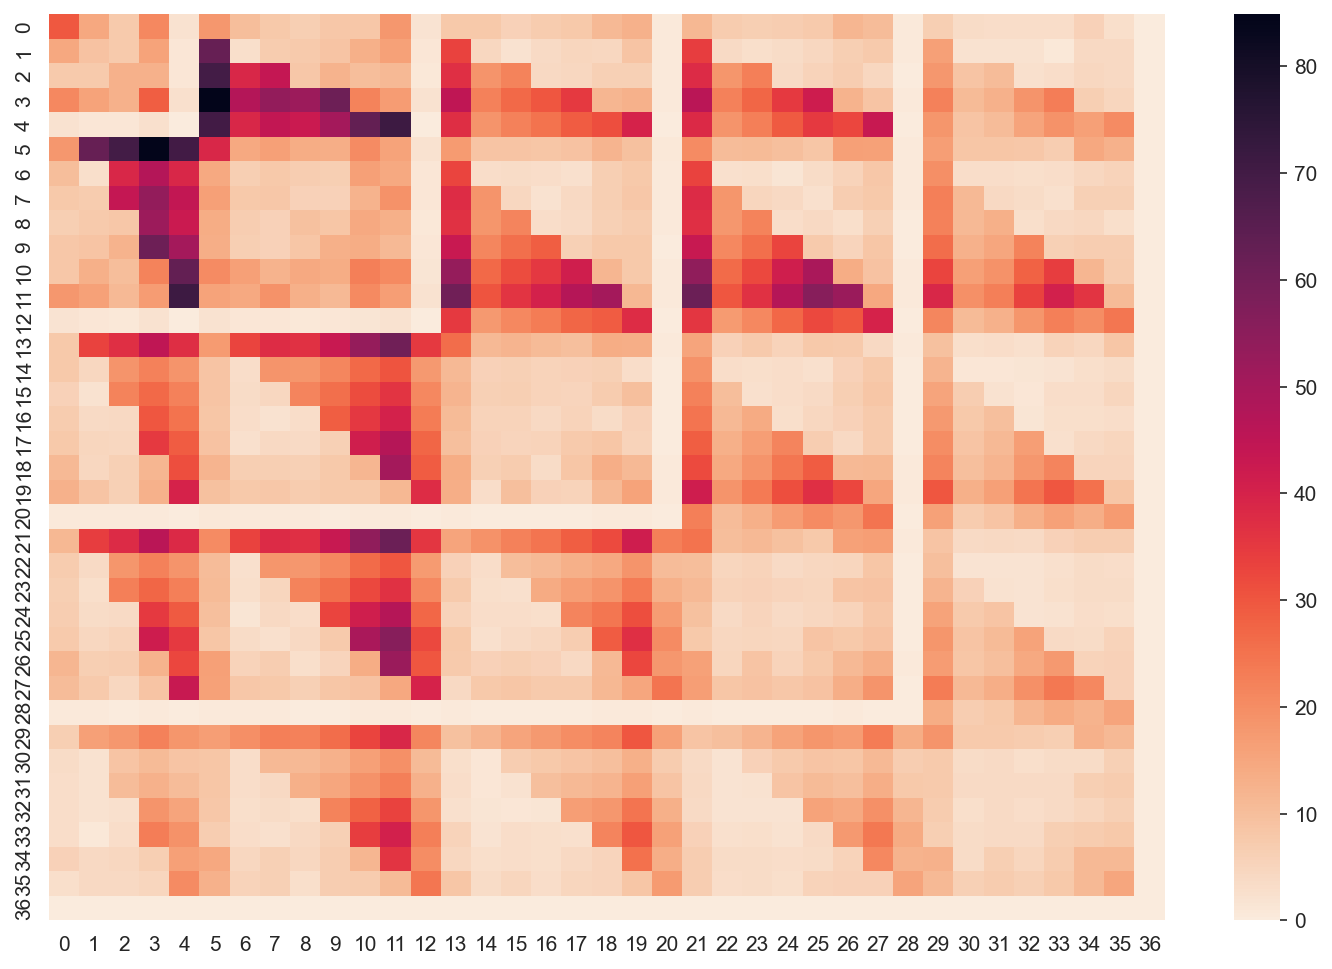

In [291]:
plt.figure(figsize=(12, 8), dpi=150)

sns.heatmap(np.power(np.abs(hes.hessian[0] - abh.hessian[0]), 1 / 5), cmap='rocket_r')

In [104]:
abh.hessian[0][11][5]

-18440623893.21613

In [307]:
abh.evs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-5.223716e+05,-454990.384287,-280172.726290,-230034.676141,-169232.879890,-39482.096249,-7853.648094,-3119.340744,-1237.663851,-588.324509,-221.146831,-85.551737,188.021899,744.228180,1166.719791,1933.409962,3877.443550,10933.699204,19450.074505,67279.513381,128723.470711,295812.058627,905152.128903,1.221701e+06,1.914029e+06,2.440243e+06,2.953166e+06,8.905495e+06,9.544850e+06,1.812364e+07,3.825219e+07,7.152591e+07,1.900821e+08,4.510096e+08,5.340572e+08,8.623580e+08,4.736235e+10
1,-5.212099e+05,-453912.554434,-279530.885469,-229725.835057,-168863.981861,-39379.536382,-7834.855535,-3104.206646,-1233.090115,-587.430920,-220.773755,-85.712027,183.685758,735.603245,1136.547933,1932.659828,3828.949992,10926.184585,19421.862813,67337.992043,128528.517935,296508.087580,904964.882052,1.220435e+06,1.911455e+06,2.439356e+06,2.946589e+06,8.894253e+06,9.535907e+06,1.809431e+07,3.822491e+07,7.147492e+07,1.896248e+08,4.505965e+08,5.339159e+08,8.616605e+08,4.736597e+10
2,-5.198919e+05,-452667.465131,-278821.614429,-229370.224414,-168445.387219,-39262.343871,-7813.444919,-3087.404777,-1228.316466,-586.518619,-220.353606,-85.869372,178.929509,726.189337,1103.120463,1931.764989,3776.815995,10917.483633,19391.350024,67402.778994,128300.412556,297287.338591,904821.174284,1.219063e+06,1.908569e+06,2.438216e+06,2.939663e+06,8.881953e+06,9.526110e+06,1.806384e+07,3.819446e+07,7.140631e+07,1.891190e+08,4.501381e+08,5.337729e+08,8.608684e+08,4.737060e+10
3,-5.185104e+05,-451359.405986,-277964.826572,-228904.954339,-167997.391791,-39136.674361,-7790.383163,-3070.376075,-1223.370738,-585.074286,-219.898302,-85.859676,174.201493,716.536751,1065.925859,1930.800498,3722.003585,10906.568246,19347.371966,67473.469267,128046.412047,298164.022838,904598.292910,1.217599e+06,1.905425e+06,2.436636e+06,2.932148e+06,8.868269e+06,9.515172e+06,1.802929e+07,3.816079e+07,7.133850e+07,1.885648e+08,4.496274e+08,5.336011e+08,8.600034e+08,4.737519e+10
4,-5.169767e+05,-449924.868981,-277071.878456,-228434.414266,-167496.310674,-38997.114175,-7764.556661,-3050.199248,-1218.022242,-584.029722,-219.440207,-85.924070,168.904683,706.010823,1023.424710,1929.623291,3660.799287,10896.118220,19309.113479,67550.442059,127754.776965,299154.722198,904442.225695,1.215916e+06,1.902013e+06,2.434519e+06,2.924230e+06,8.853684e+06,9.503153e+06,1.799286e+07,3.812409e+07,7.125449e+07,1.879530e+08,4.490633e+08,5.334274e+08,8.590393e+08,4.738072e+10
5,-5.150872e+05,-448115.227296,-276003.224095,-227840.973511,-166884.108364,-38825.182248,-7733.421508,-3027.391158,-1212.322993,-582.770815,-218.868388,-85.922974,163.317478,694.813600,975.968734,1928.375758,3594.707062,10884.430689,19267.249217,67637.608098,127431.841070,300253.612412,904229.414516,1.214043e+06,1.897700e+06,2.431783e+06,2.915950e+06,8.834985e+06,9.489405e+06,1.795020e+07,3.807638e+07,7.116365e+07,1.872809e+08,4.484420e+08,5.332077e+08,8.579973e+08,4.738622e+10
6,-5.132238e+05,-446353.335267,-274875.084538,-227208.326931,-166271.691846,-38653.258457,-7701.321828,-3002.825452,-1206.540970,-581.623344,-218.354249,-85.832502,157.477855,682.910015,922.919727,1926.757126,3525.539602,10871.974896,19220.346163,67730.618522,127048.347860,301507.025367,904073.338158,1.211968e+06,1.893495e+06,2.428310e+06,2.907437e+06,8.816756e+06,9.474542e+06,1.790595e+07,3.803105e+07,7.105979e+07,1.865422e+08,4.477551e+08,5.329995e+08,8.568391e+08,4.739284e+10
7,-5.111591e+05,-444352.148538,-273596.177494,-226469.009032,-165582.060078,-38461.211784,-7665.573946,-2976.030310,-1200.317978,-580.463719,-217.763428,-85.623975,151.441813,670.245356,870.618370,1924.787235,3460.175050,10858.938304,19168.441645,67830.059005,126616.264725,302896.556995,903986.365007,1.209768e+06,1.888807e+06,2.424470e+06,2.899429e+06,8.796033e+06,9.458164e+06,1.785601e+07,3.798009e+07,7.094835e+07,1.857342e+08,4.469986e+08,5.327461e+08,8.555738e+08,4.739980e+10
8,-5.088598e+05,-4421

<AxesSubplot:>

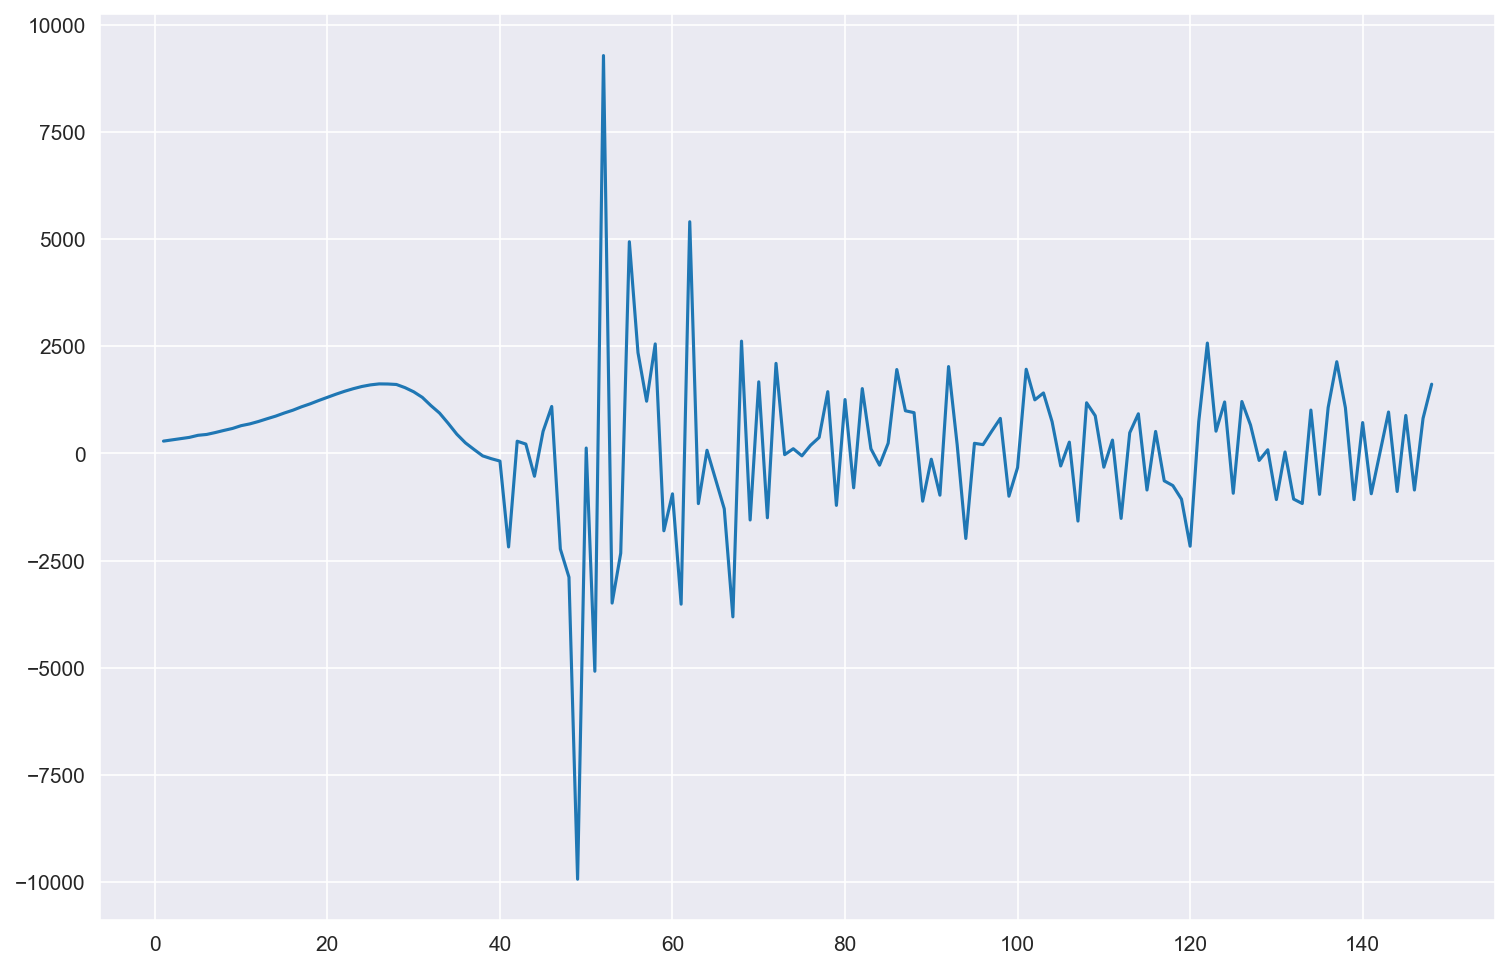

In [50]:
endn = len(abhst.errors) - 1
ggs = []

for i in range(1, endn):
    g = abh.errors[i] - abh.errors[i - 1]
    stg = abhst.errors[i] - abhst.errors[i - 1]
    ggs.append(g - stg)

plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(x=[x for x in range(1, endn)], y=ggs)

In [34]:
abhlla.evs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-3.450493e+09,-4.892330e+08,-3.661020e+08,-2.172266e+08,-1.129083e+08,-7.601197e+07,-3.638091e+07,-1.683134e+07,-1.585078e+07,-9.747259e+06,-2.422834e+06,-1.717134e+06,-1.433501e+06,-505860.923724,-383420.578052,-145682.504466,-83647.180431,-10097.966800,-8883.006207,-417.177849,84978.181070,209591.586456,893275.739435,1.562423e+06,3.388373e+06,3.690367e+06,9.670413e+06,1.947119e+07,1.067062e+08,2.117435e+08,2.509236e+08,4.061927e+08,5.167639e+08,6.716953e+08,1.180214e+09,4.721665e+09,4.624709e+10
1,-3.474469e+09,-4.935767e+08,-3.688052e+08,-2.161859e+08,-1.128084e+08,-7.690538e+07,-3.581992e+07,-1.697254e+07,-1.616756e+07,-1.023321e+07,-2.420658e+06,-1.730252e+06,-1.474717e+06,-470734.461256,-402038.679895,-137776.413953,-82839.436932,-13505.741746,-3067.148995,-146.205056,143334.631360,265023.948519,727859.644287,1.619713e+06,3.192439e+06,3.451379e+06,8.344989e+06,1.941106e+07,1.062292e+08,1.946900e+08,2.475759e+08,4.045875e+08,5.106831e+08,6.642103e+08,1.169775e+09,4.728792e+09,4.631606e+10
2,-3.460677e+09,-4.935168e+08,-3.681169e+08,-2.146160e+08,-1.131847e+08,-7.663414e+07,-3.586517e+07,-1.700373e+07,-1.619125e+07,-9.979540e+06,-2.309398e+06,-1.492959e+06,-1.444502e+06,-468960.406636,-385241.528174,-134116.047601,-81207.221884,-12687.246787,-2817.888088,-210.694083,147896.812538,315493.983445,772511.513771,1.613914e+06,3.124095e+06,3.430733e+06,8.491292e+06,1.948972e+07,1.064507e+08,1.863903e+08,2.454757e+08,4.049094e+08,5.174022e+08,6.661485e+08,1.178367e+09,4.701143e+09,4.621057e+10
3,-3.471345e+09,-4.941120e+08,-3.689849e+08,-2.133999e+08,-1.130020e+08,-7.677724e+07,-3.569973e+07,-1.709216e+07,-1.625904e+07,-1.009187e+07,-2.326010e+06,-1.523778e+06,-1.456564e+06,-475164.248309,-365093.309896,-134130.344910,-78417.073410,-13885.782422,-1919.989748,-195.583653,149769.120024,357832.361222,815907.932302,1.626564e+06,3.088166e+06,3.329723e+06,8.001832e+06,1.947295e+07,1.062027e+08,1.847267e+08,2.428996e+08,4.043812e+08,5.132441e+08,6.636877e+08,1.170410e+09,4.704929e+09,4.626440e+10
4,-3.464181e+09,-4.943694e+08,-3.689028e+08,-2.144425e+08,-1.132180e+08,-7.674346e+07,-3.585232e+07,-1.713831e+07,-1.626177e+07,-9.979772e+06,-2.302724e+06,-1.493815e+06,-1.442951e+06,-473846.231197,-345297.664468,-133947.439960,-78423.597480,-13216.073246,-1928.382640,-194.730659,150608.548522,352812.167057,787167.309360,1.616161e+06,3.040455e+06,3.376906e+06,8.133941e+06,1.949574e+07,1.063142e+08,1.845026e+08,2.435573e+08,4.042893e+08,5.153315e+08,6.640842e+08,1.173151e+09,4.689669e+09,4.622522e+10
5,-3.469065e+09,-4.943459e+08,-3.692298e+08,-2.133312e+08,-1.130906e+08,-7.674288e+07,-3.574032e+07,-1.715505e+07,-1.627902e+07,-1.002967e+07,-2.308720e+06,-1.507443e+06,-1.448585e+06,-480495.632929,-336132.383532,-134322.600729,-76399.184214,-13913.435527,-1566.343546,-167.978567,150369.948231,351257.873490,836472.501645,1.623494e+06,3.018626e+06,3.315879e+06,7.857293e+06,1.949035e+07,1.061711e+08,1.821767e+08,2.419386e+08,4.040200e+08,5.131130e+08,6.625480e+08,1.168557e+09,4.692004e+09,4.625230e+10
6,-3.464611e+09,-4.945192e+08,-3.692252e+08,-2.146124e+08,-1.132302e+08,-7.679692e+07,-3.588838e+07,-1.719243e+07,-1.627593e+07,-9.976467e+06,-2.303310e+06,-1.519295e+06,-1.456876e+06,-480278.491388,-321863.359400,-135025.569624,-76685.017420,-13392.723425,-1483.197051,-161.239932,151696.928892,343180.487303,798801.675425,1.613038e+06,2.999936e+06,3.374762e+06,7.998829e+06,1.949770e+07,1.062634e+08,1.851569e+08,2.430634e+08,4.039644e+08,5.140889e+08,6.629693e+08,1.169889e+09,4.683127e+09,4.623343e+10
7,-3.466704e+09,-4.943376e+08,-3.692727e+08,-2.132929e+08,-1.131445e+08,-7.674525e+07,-3.576990e+07,-1.719253e+07,-1.628942e+07,-9.993297e+06,-2.300331e+06,-1.504608e+06,-1.449916e+06,-485615.532677,-314750.318003,-134827.112082,-74688.390384,-13894.127474,-1292.009757,-125.864871,151018.343000,336571.594222,852723.814886,1.620448e+06,2.975350e+06,3.31924

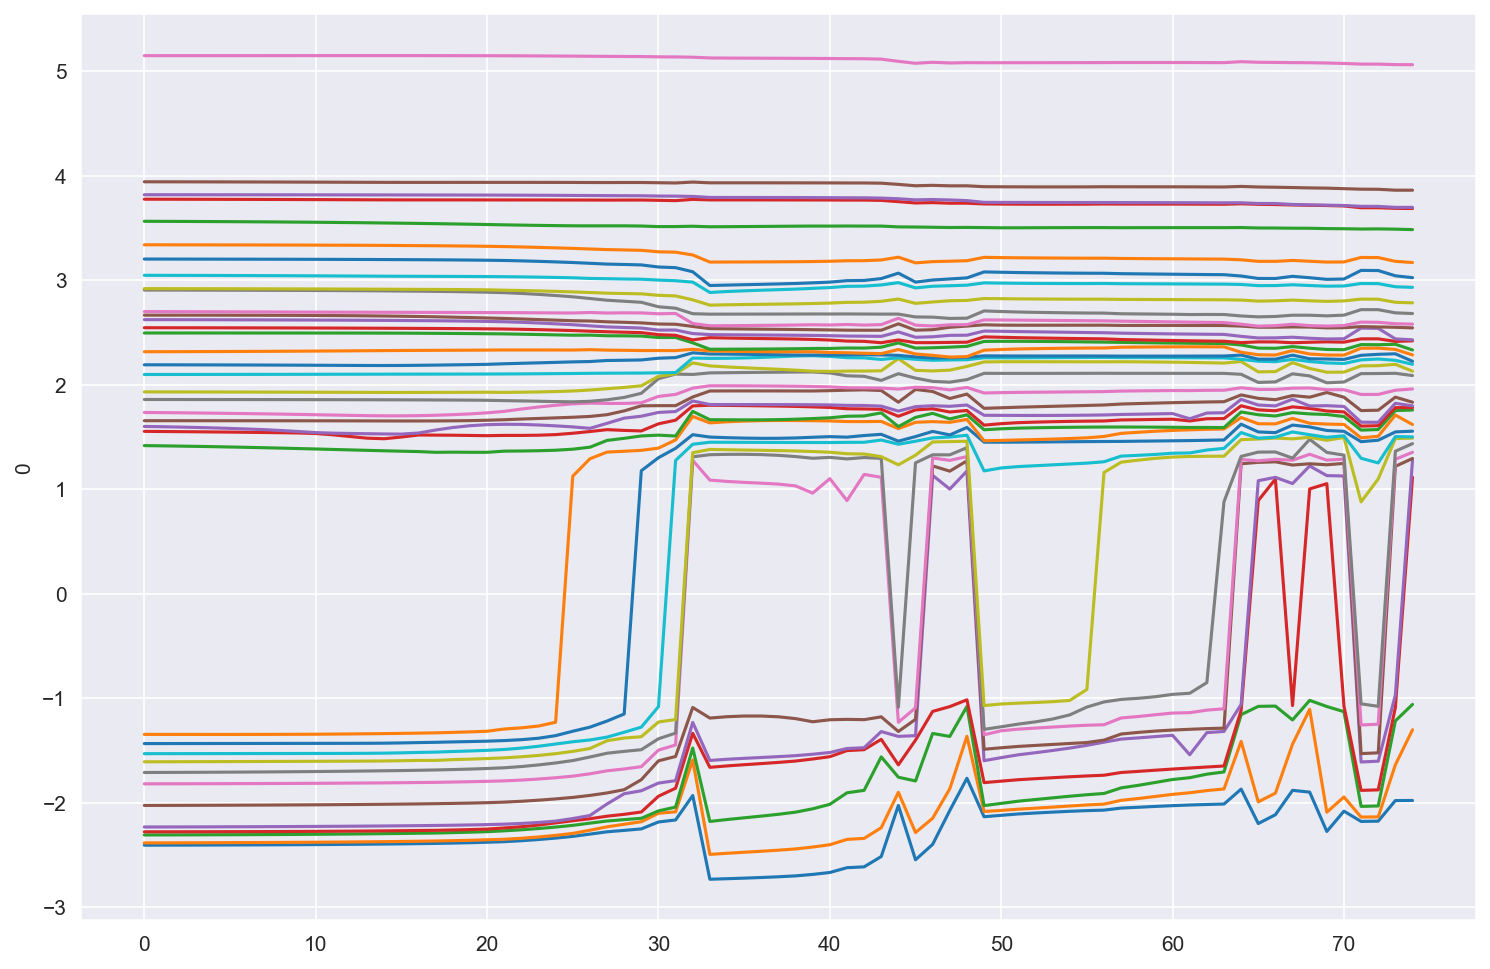

In [310]:
logevs = np.sign(abh.evs) * abh.evs.abs() ** (1 / 15)

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

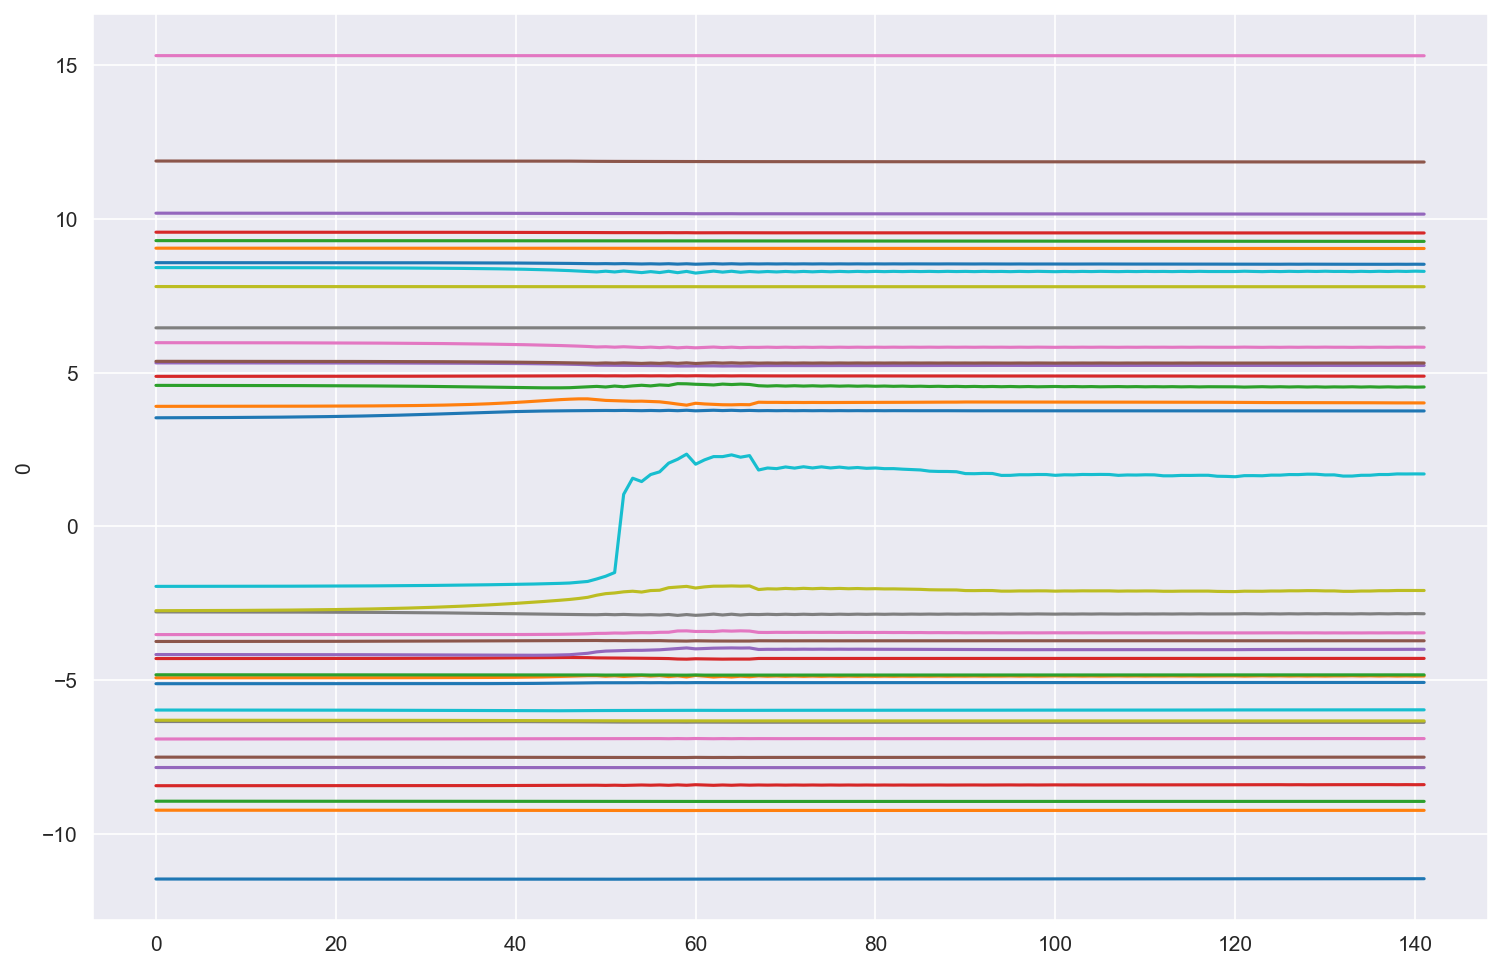

In [196]:
logevs = np.sign(evs) * evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

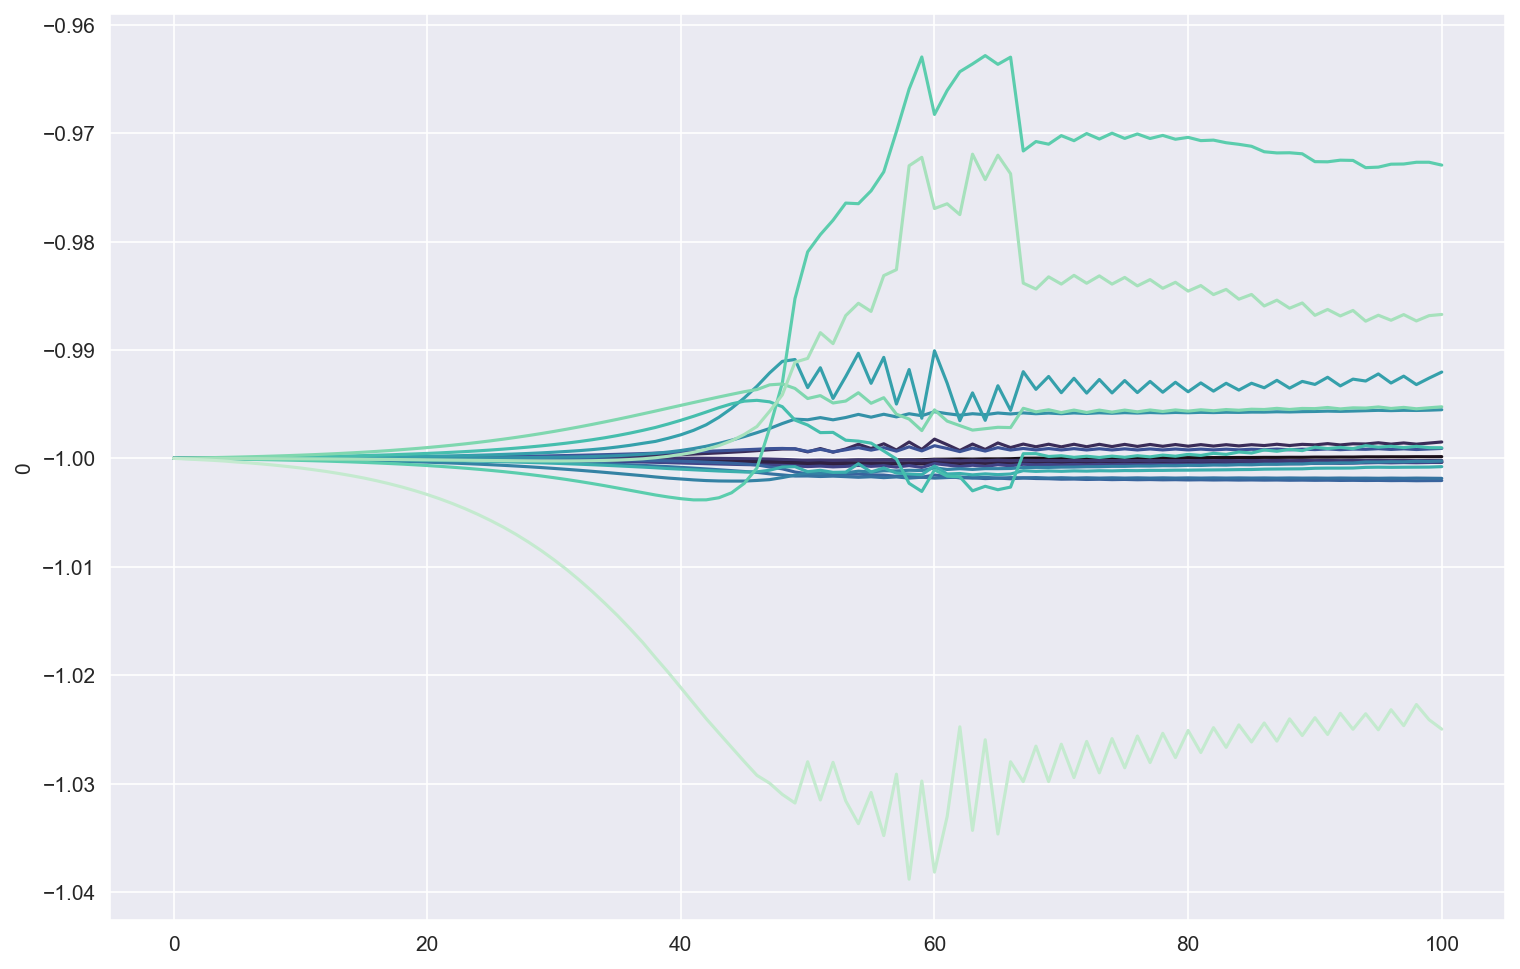

In [181]:
plt.figure(figsize=(12, 8), dpi=150)

n = len(logevs.columns)
n = 18
pal = sns.color_palette('mako', n)
for i in range(n):
    sns.lineplot(x=logevs.index, y=logevs[i] / abs(logevs.iloc[0, i]), color=pal[i])
